In [ ]:
#Installed pytorch version 1.8.1 and nvidia cuda version 11.7 using pip in the terminal.

In [2]:
import torch

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\jobif/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-11 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
#making detections with images

In [4]:
img= 'https://people.com/thmb/qTOEpJClCgNxXccopOJOex-vzlg=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(499x0:501x2):format(webp)/POTY-cover-tout-d827554fa3c949c59a9d494773a7c409.jpg'

In [5]:
results= model(img)
results.print()

image 1/1: 500x750 4 persons, 1 tie
Speed: 1302.8ms pre-process, 150.9ms inference, 129.1ms NMS per image at shape (1, 3, 448, 640)


In [6]:
results = model(img)
results.print()

image 1/1: 500x750 4 persons, 1 tie
Speed: 181.5ms pre-process, 93.1ms inference, 5.0ms NMS per image at shape (1, 3, 448, 640)


In [7]:
img='https://economictimes.indiatimes.com/thumb/msid-60457478,width-1200,height-900,resizemode-4,imgsize-57900/indias-traffic-is-so-bad-its-changing-the-cars-people-buy.jpg?from=mdr'

In [8]:
results = model(img)
results.print()

image 1/1: 900x1200 12 persons, 22 cars, 4 motorcycles, 6 buss
Speed: 578.5ms pre-process, 100.8ms inference, 7.3ms NMS per image at shape (1, 3, 480, 640)


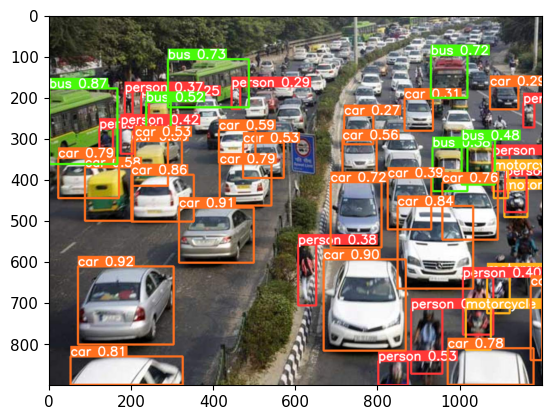

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

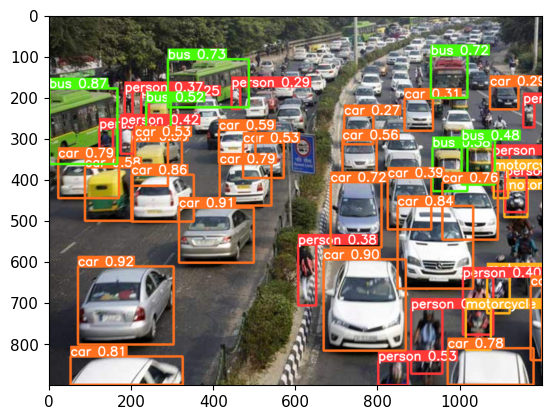

In [12]:
plt.imshow(np.squeeze(results.render()))

In [ ]:
# REAL TIME DETECTIONS

In [13]:
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() #ret holds the boolean value whether a frame was detected. frame is the image.
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render())) # render holds the image in array format. squeeze extracts the information

    #press q on keyboard to exit
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() # destroys the popup

In [ ]:
#TRAIN FROM SCRATCH

In [4]:
import uuid# unique identifier
import os
import time

In [5]:
path = "/Users/jobif/yolov5"
IMAGES_PATH = os.path.join(path,'drowsydata/images') # a subfolder ./drowsydata/images
labels = ('awake','drowsy') #2 classes
number_imgs = 20 #collect 20 pics for each class

In [42]:
cap=cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {},image number {}'.format(label,img_num))
       
        #webcam feed
        ret,frame=cap.read()
        
        #naming out image path
        imgname = os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')#uuid creates a unique id
        
        #writes out image to file
        cv2.imwrite(imgname,frame)

        #render to screen
        cv2.imshow('Image Collection',frame)
        #delat between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xff == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
for label in labels:
    print('Collecting images for {}'.format(labels))    
    for img_num in range(number_imgs):
        print('Collecting images for {},image number {}'.format(label,img_num))        
        imgname = os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')#uuid creates a unique id
        print(imgname)

/Users/jobif/yolov5\drowsydata/images\awake.8af4943a-0396-11ee-8c1b-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4943b-0396-11ee-8554-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4bb0f-0396-11ee-8322-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4bb10-0396-11ee-86bc-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4bb11-0396-11ee-8304-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4bb12-0396-11ee-a28e-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4bb13-0396-11ee-a115-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4e205-0396-11ee-b78a-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4e206-0396-11ee-b696-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4e207-0396-11ee-9088-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4e208-0396-11ee-86bb-50e0853d97f2.jpg
/Users/jobif/yolov5\drowsydata/images\awake.8af4e209-0396-11ee-9d

In [18]:
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [19]:
!pip install pyqt5 lxml --upgrade
!cd  labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!cd yolov5 & python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   7dc495f..934e881  ultralytics_cleanup -> origin/ultralytics_cleanup
github:  YOLOv5 is out of date by 4 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-172-gc3c1304 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, wa

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\jobif/.cache\torch\hub\master.zip
YOLOv5  2023-6-13 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
img=os.path.join(path,'drowsydata','images','drowsy.a4ab7ed8-0424-11ee-bc33-50e0853d97f2.jpg')

In [8]:
results=model(img)

In [9]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 95.2ms pre-process, 93.6ms inference, 124.9ms NMS per image at shape (1, 3, 480, 640)


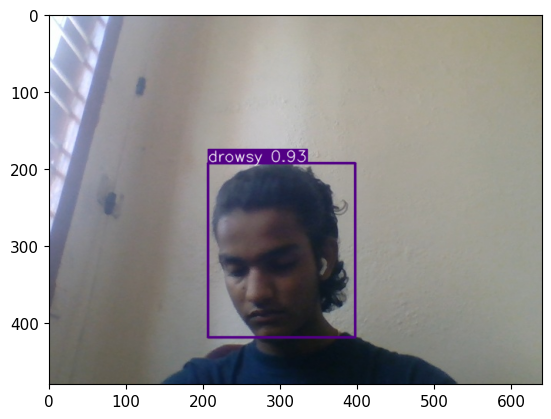

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
# real time detection
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))

    #press q on keyboard to exit
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()